In [6]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from pandas_datareader import data

In [2]:
start_date='2020-05-01'
end_date='2020-10-05'

In [3]:
GAN=data.get_data_yahoo('GAN',start_date,end_date)

In [4]:
GAN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-05,14.141,10.60,10.65,13.25,6082100,13.25
2020-05-06,14.850,12.11,13.00,13.86,2634300,13.86
2020-05-07,15.150,13.30,14.75,13.51,2480900,13.51
2020-05-08,14.840,13.10,13.86,14.41,1558900,14.41
2020-05-11,15.200,13.85,14.45,15.04,1206400,15.04


In [13]:
GAN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2020-05-05 to 2020-10-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       107 non-null    float64
 1   Low        107 non-null    float64
 2   Open       107 non-null    float64
 3   Close      107 non-null    float64
 4   Volume     107 non-null    int64  
 5   Adj Close  107 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 10.9 KB


In [5]:
GAN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000
mean,21.203383,19.399290,20.329383,20.298411,1.797654e+06,20.298411
std,4.007319,3.775089,3.918505,3.846183,1.512123e+06,3.846183
min,14.141000,10.600000,10.650000,13.000000,3.565000e+05,13.000000
25%,17.520000,16.352500,17.120000,16.940000,8.037000e+05,16.940000
50%,21.164000,19.600000,20.250000,20.290001,1.305400e+06,20.290001
75%,24.865000,22.595000,23.755000,23.495000,2.091850e+06,23.495000
max,28.950001,26.809999,28.430000,27.580000,8.281300e+06,27.580000


In [6]:
def change(column):
    buyPrice=column[0]
    curPrice=column[107-1]
    priceChange=(curPrice-buyPrice)/buyPrice
    if(priceChange>0):
        print('Stocks have risen=',priceChange)
    elif (priceCharge>0):
        print('No change in stock cumulative=',priceChange)
    else:
        print('Stocks have dropped=',priceChange)
    
    return priceChange

closeCol=GAN['Close']

GAN_change=change(closeCol)

Stocks have risen= 0.3728302289854805


In [18]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
plt.rcParams['axes.unicode_minus']=False

In [51]:
idx=pd.to_datetime(GAN.index)

In [63]:
dateRange=pd.date_range(start_date,end_date,freq='D')

In [65]:
GAN1=pd.DataFrame(GAN,index=dateRange)

In [67]:
GAN1.index

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10',
               ...
               '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03',
               '2020-10-04', '2020-10-05'],
              dtype='datetime64[ns]', length=158, freq='D')

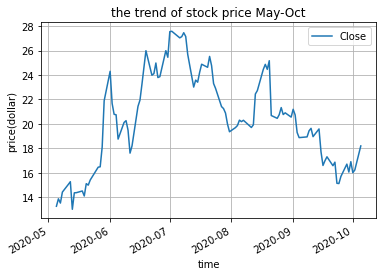

In [91]:
GAN.plot(y='Close')

plt.title('the trend of stock price May-Oct')
plt.xlabel('time')
plt.ylabel('price(dollar)')
plt.grid(True)
plt.show()

In [85]:
GAN1=pd.Series(GAN['Close'],index=GAN.index)

In [90]:
GAN1

Date
2020-05-05    13.250000
2020-05-06    13.860000
2020-05-07    13.510000
2020-05-08    14.410000
2020-05-11    15.040000
                ...    
2020-09-29    16.049999
2020-09-30    16.900000
2020-10-01    16.000000
2020-10-02    16.219999
2020-10-05    18.190001
Name: Close, Length: 107, dtype: float64

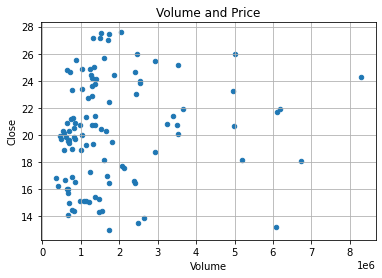

In [93]:
GAN.plot(x='Volume',y='Close',kind='scatter')
plt.xlabel('Volume')
plt.title('Volume and Price')
plt.grid(True)
plt.show()

In [94]:
GAN.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.977836,0.976341,0.985483,0.205517,0.985483
Low,0.977836,1.000000,0.978891,0.981679,0.052795,0.981679
Open,0.976341,0.978891,1.000000,0.959422,0.084008,0.959422
Close,0.985483,0.981679,0.959422,1.000000,0.128850,1.000000
Volume,0.205517,0.052795,0.084008,0.128850,1.000000,0.128850
Adj Close,0.985483,0.981679,0.959422,1.000000,0.128850,1.000000


In [96]:
GAN['Close'].mean()

20.298411199979693